In [2]:
#dependencies
import pandas as pd
state_data = "Resources/StateData.csv"
geocodes_data = "Resources/Geocodes_USA_with_Counties.csv"
CHR_data = "Resources/CHR_Data.csv"
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

In [3]:
#create state df
state_df = pd.read_csv(state_data)
red_state_df = state_df.loc[:, ["State", "Code"]]
red_state_df.head()

,State,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
#create geocodes df
geocodes_df = pd.read_csv(geocodes_data)
red_geocodes_df = geocodes_df.loc[:, ["county", "state","zip","latitude","longitude"]]
# red_geocodes_df["zip"] = map(lambda x: x.zfill(5), red_geocodes_df["zip"])
# zero_zip = zip_str.zfill(5)
# red_geocodes_df["zip"] = red_geocodes_df["zip"].astype(str)
red_geocodes_df = red_geocodes_df.rename(columns={"county":"County", "state":"Code", "latitude":"Lat","longitude":"Lon"})
red_geocodes_df.head()
# zero_zip
# red_geocodes_df["zip"].head()
len(red_geocodes_df)

42522

In [5]:
red_geocodes_df = red_geocodes_df.drop_duplicates(subset=("County", "Code"), keep = "first")
len(red_geocodes_df)

3231

In [6]:
#create data frame
#https://thispointer.com/pandas-skip-rows-while-reading-csv-file-to-a-dataframe-using-read_csv-in-python/
CHR_df = pd.read_csv(CHR_data, skiprows = 1)
CHR_df.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (AIAN),YPLL Rate (AIAN) 95% CI - Low,...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (White),% Drive Alone (White) 95% CI - Low,% Drive Alone (White) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.18,95% CI - High.18,Quartile.34
0,1000,Alabama,NaN,81791.0,9943.0,9841.0,10045.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2051445.0,34.0,34.0,35.0,NaN
1,1001,Alabama,Autauga,791.0,8129.0,7283.0,8974.0,1.0,NaN,NaN,...,NaN,NaN,84.0,80.0,89.0,24428.0,40.0,36.0,43.0,3.0
2,1003,Alabama,Baldwin,2967.0,7354.0,6919.0,7790.0,1.0,NaN,NaN,...,56.0,81.0,83.0,81.0,85.0,91420.0,42.0,39.0,44.0,3.0
3,1005,Alabama,Barbour,472.0,10254.0,8782.0,11725.0,2.0,NaN,NaN,...,NaN,NaN,87.0,85.0,90.0,8538.0,32.0,27.0,37.0,2.0
4,1007,Alabama,Bibb,471.0,11978.0,10344.0,13611.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7946.0,50.0,42.0,58.0,4.0


In [7]:
red_CHR_df = CHR_df.loc[:, ["FIPS", "State", "County",
                                    "Years of Potential Life Lost Rate", "% Fair or Poor Health", "Average Number of Physically Unhealthy Days", 
                                    "Average Number of Mentally Unhealthy Days", "% Adults with Obesity","Food Environment Index", "% With Access to Exercise Opportunities",
                                    "% Uninsured", "Primary Care Physicians Ratio","Preventable Hospitalization Rate","Population", "% Unemployed",
                                    "Income Ratio", "Social Association Rate"]]
red_CHR_df

,FIPS,State,County,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% With Access to Exercise Opportunities,% Uninsured,Primary Care Physicians Ratio,Preventable Hospitalization Rate,Population,% Unemployed,Income Ratio,Social Association Rate
0,1000,Alabama,NaN,9943.0,22,4.9,4.9,36,5.8,61.0,11.0,1543:01:00,5805.0,1232042,3.9,5.3,12.4
1,1001,Alabama,Autauga,8129.0,21,4.7,4.7,33,7.2,69.0,9.0,2220:01:00,7108.0,14438,3.6,5.2,12.1
2,1003,Alabama,Baldwin,7354.0,18,4.2,4.3,31,8.0,74.0,11.0,1372:01:00,4041.0,48703,3.6,4.4,10.2
3,1005,Alabama,Barbour,10254.0,30,5.4,5.2,42,5.6,53.0,12.0,3159:01:00,6209.0,6779,5.2,5.7,7.5
4,1007,Alabama,Bibb,11978.0,19,4.6,4.6,38,7.8,16.0,10.0,2061:01:00,5961.0,5970,4.0,4.4,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,7832.0,15,3.4,3.6,30,7.7,90.0,14.0,2721:01:00,2854.0,12573,4.2,4.0,10.3
3189,56039,Wyoming,Teton,2731.0,12,3.0,3.2,12,8.2,100.0,16.0,862:01:00,2130.0,7972,3.0,3.8,16.3
3190,56041,Wyoming,Uinta,7331.0,16,3.6,3.7,36,7.4,84.0,14.0,2277:01:00,3442.0,5152,4.4,4.4,2.9
3191,56043,Wyoming,Washakie,6586.0,16,3.6,3.7,29,8.3,83.0,17.0,2016:01:00,3979.0,1767,4.2,3.3,16.1


In [8]:
clean_df = red_CHR_df.dropna()
len(clean_df)

2740

In [9]:
# # pick top and bottom counties and create study dataframe

# n_cities=20

# top_n = clean_df.nlargest(n_cities, ['Preventable Hospitalization Rate'])
# bottom_n = clean_df.nsmallest(n_cities, ['Preventable Hospitalization Rate'])
# study_df = pd.concat([top_n,bottom_n])

# study_df = study_df.reset_index(drop=True)
# study_df.head()

In [10]:
study_state_data_df = pd.merge(clean_df,red_state_df,on="State")
# study_state_data_df.head()
len(study_state_data_df)

2740

In [11]:
#add geocode data
study_state_geodata_df = pd.merge(study_state_data_df,red_geocodes_df,on=["Code","County"], how = 'left')
study_state_geodata_df

,FIPS,State,County,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% With Access to Exercise Opportunities,...,Primary Care Physicians Ratio,Preventable Hospitalization Rate,Population,% Unemployed,Income Ratio,Social Association Rate,Code,zip,Lat,Lon
0,1001,Alabama,Autauga,8129.0,21,4.7,4.7,33,7.2,69.0,...,2220:01:00,7108.0,14438,3.6,5.2,12.1,AL,36003.0,32.43,-86.65
1,1003,Alabama,Baldwin,7354.0,18,4.2,4.3,31,8.0,74.0,...,1372:01:00,4041.0,48703,3.6,4.4,10.2,AL,36507.0,30.88,-87.77
2,1005,Alabama,Barbour,10254.0,30,5.4,5.2,42,5.6,53.0,...,3159:01:00,6209.0,6779,5.2,5.7,7.5,AL,36016.0,31.88,-85.45
3,1007,Alabama,Bibb,11978.0,19,4.6,4.6,38,7.8,16.0,...,2061:01:00,5961.0,5970,4.0,4.4,8.4,AL,35034.0,32.94,-87.17
4,1009,Alabama,Blount,11335.0,22,4.9,4.9,34,8.4,16.0,...,4463:01:00,4060.0,13939,3.5,4.4,8.4,AL,35013.0,33.90,-86.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,56037,Wyoming,Sweetwater,7832.0,15,3.4,3.6,30,7.7,90.0,...,2721:01:00,2854.0,12573,4.2,4.0,10.3,WY,82322.0,42.23,-107.55
2736,56039,Wyoming,Teton,2731.0,12,3.0,3.2,12,8.2,100.0,...,862:01:00,2130.0,7972,3.0,3.8,16.3,WY,83001.0,43.47,-110.76
2737,56041,Wyoming,Uinta,7331.0,16,3.6,3.7,36,7.4,84.0,...,2277:01:00,3442.0,5152,4.4,4.4,2.9,WY,82930.0,41.25,-110.96
2738,56043,Wyoming,Washakie,6586.0,16,3.6,3.7,29,8.3,83.0,...,2016:01:00,3979.0,1767,4.2,3.3,16.1,WY,82401.0,44.00,-107.95


In [12]:
study_state_geodata2_df = study_state_geodata_df.drop_duplicates(subset=("FIPS"), keep = "first")
study_state_geodata2_df.head()
# len(study_state_geodata2_df)

,FIPS,State,County,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% With Access to Exercise Opportunities,...,Primary Care Physicians Ratio,Preventable Hospitalization Rate,Population,% Unemployed,Income Ratio,Social Association Rate,Code,zip,Lat,Lon
0,1001,Alabama,Autauga,8129.0,21,4.7,4.7,33,7.2,69.0,...,2220:01:00,7108.0,14438,3.6,5.2,12.1,AL,36003.0,32.43,-86.65
1,1003,Alabama,Baldwin,7354.0,18,4.2,4.3,31,8.0,74.0,...,1372:01:00,4041.0,48703,3.6,4.4,10.2,AL,36507.0,30.88,-87.77
2,1005,Alabama,Barbour,10254.0,30,5.4,5.2,42,5.6,53.0,...,3159:01:00,6209.0,6779,5.2,5.7,7.5,AL,36016.0,31.88,-85.45
3,1007,Alabama,Bibb,11978.0,19,4.6,4.6,38,7.8,16.0,...,2061:01:00,5961.0,5970,4.0,4.4,8.4,AL,35034.0,32.94,-87.17
4,1009,Alabama,Blount,11335.0,22,4.9,4.9,34,8.4,16.0,...,4463:01:00,4060.0,13939,3.5,4.4,8.4,AL,35013.0,33.90,-86.51


In [13]:
study_state_geodata2_df = study_state_geodata2_df.dropna()
len(study_state_geodata2_df)

2645

In [14]:
study_state_geodata2_df.to_csv("Resources/FullData.csv")

In [82]:
# pick top and bottom counties and create study dataframe

n_cities=20

top_n = study_state_geodata2_df.nlargest(n_cities, ['Preventable Hospitalization Rate'])
bottom_n = study_state_geodata2_df.nsmallest(n_cities, ['Preventable Hospitalization Rate'])
study_df = pd.concat([top_n,bottom_n])

study_df = study_df.reset_index(drop=True)
study_df

,FIPS,State,County,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Adults with Obesity,Food Environment Index,% With Access to Exercise Opportunities,...,Primary Care Physicians Ratio,Preventable Hospitalization Rate,Population,% Unemployed,Income Ratio,Social Association Rate,Code,zip,Lat,Lon
0,54059,West Virginia,Mingo,14564.0,28,6.3,6.1,37,7.1,53.0,...,4825:01:00,16802.0,5950,7.6,5.3,8.3,WV,24846.0,37.53,-81.85
1,21171,Kentucky,Monroe,12131.0,24,5.2,5.0,37,7.8,46.0,...,2132:01:00,15420.0,2458,4.1,5.8,9.4,KY,42133.0,36.72,-85.96
2,40057,Oklahoma,Harmon,14123.0,22,4.4,4.4,32,8.2,79.0,...,2689:01:00,14776.0,704,2.9,4.9,14.9,OK,73544.0,34.66,-99.77
3,54045,West Virginia,Logan,15459.0,26,5.8,5.8,42,7.5,29.0,...,2058:01:00,14383.0,8350,7.0,5.5,6.7,WV,25022.0,37.86,-81.83
4,21055,Kentucky,Crittenden,10623.0,22,5.0,5.0,31,8.1,7.0,...,2271:01:00,13912.0,2101,5.2,4.7,14.3,KY,42033.0,37.27,-88.08
5,1133,Alabama,Winston,10860.0,21,4.8,5.0,38,8.0,76.0,...,2372:01:00,13447.0,5259,4.2,4.4,9.3,AL,35540.0,34.19,-87.17
6,21159,Kentucky,Martin,12927.0,28,5.6,5.3,41,7.2,49.0,...,2863:01:00,13308.0,3495,6.5,5.8,4.4,KY,41203.0,37.83,-82.43
7,21095,Kentucky,Harlan,14336.0,28,6.1,5.8,32,5.7,59.0,...,3339:01:00,13164.0,6533,7.4,5.6,9.0,KY,40801.0,36.83,-83.25
8,40029,Oklahoma,Coal,13485.0,21,4.7,4.9,35,6.4,48.0,...,5642:01:00,12894.0,1200,3.8,5.7,12.4,OK,74534.0,34.60,-96.34
9,21057,Kentucky,Cumberland,9517.0,23,5.0,4.9,37,7.7,11.0,...,2235:01:00,12534.0,1303,4.5,5.9,6.0,KY,42717.0,36.79,-85.36


In [83]:
study_df.to_csv("Resources/StudyData.csv")

In [27]:
prev_hosp = study_state_geodata2_df["Preventable Hospitalization Rate"]
food_index = study_state_geodata2_df["Food Environment Index"]
years_ll = study_state_geodata2_df["Years of Potential Life Lost Rate"]
obesity = study_state_geodata2_df["% Adults with Obesity"]
unempl = study_state_geodata2_df["% Unemployed"]
income_ratio = study_state_geodata2_df["Income Ratio"]
fair_health = study_state_geodata2_df['% Fair or Poor Health']


The r-squared is: 0.23082900956105099


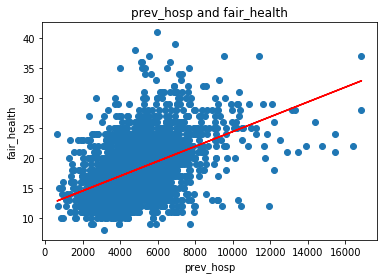

In [34]:
x_values = prev_hosp
y_values = fair_health

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('prev_hosp')
plt.ylabel('fair_health')
plt.title(f"prev_hosp and fair_health")
plt.show()

The r-squared is: 0.43115204475920565


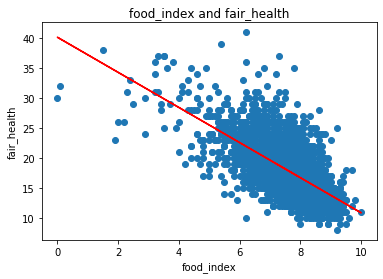

In [33]:
x_values = food_index
y_values = fair_health

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('food_index')
plt.ylabel('fair_health')
plt.title(f"food_index and fair_health")
plt.show()

The r-squared is: 0.48192398465155595


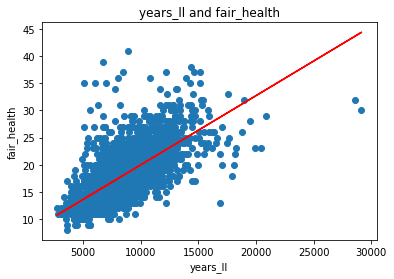

In [32]:
x_values = years_ll
y_values = fair_health

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('years_ll')
plt.ylabel('fair_health')
plt.title(f"years_ll and fair_health")
plt.show()

The r-squared is: 0.19926783759300096


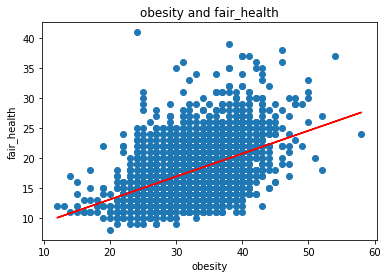

In [31]:
x_values = obesity
y_values = fair_health

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('obesity')
plt.ylabel('fair_health')
plt.title(f"obesity and fair_health")
plt.show()

The r-squared is: 0.26235014443058535


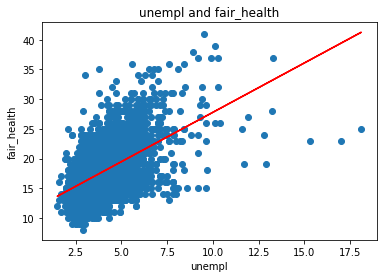

In [30]:
x_values = unempl
y_values = fair_health

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('unempl')
plt.ylabel('fair_health')
plt.title(f"unempl and fair_health")
plt.show()

The r-squared is: 0.2988310906904724


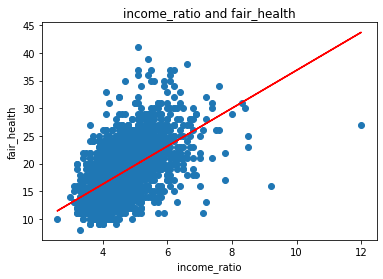

In [29]:
x_values = income_ratio
y_values = fair_health

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('income_ratio')
plt.ylabel('fair_health')
plt.title(f"income_ratio and fair_health")
plt.show()

The r-squared is: 0.06948352844316233


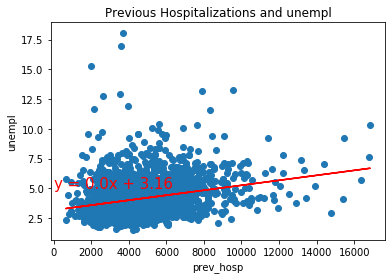

In [20]:
x_values = prev_hosp
y_values = unempl

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('prev_hosp')
plt.ylabel('unempl')
plt.title(f"Previous Hospitalizations and unempl")
plt.show()

The r-squared is: 0.12184641946618943


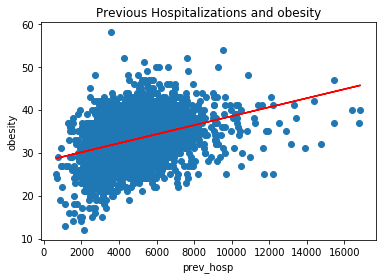

In [19]:
x_values = prev_hosp
y_values = obesity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('prev_hosp')
plt.ylabel('obesity')
plt.title(f"Previous Hospitalizations and obesity")
plt.show()

The r-squared is: 0.19582421216904475


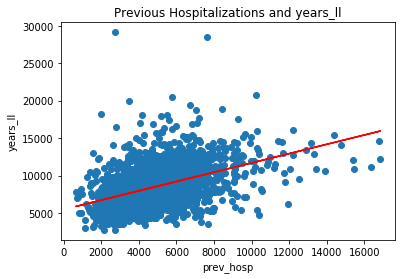

In [18]:
x_values = prev_hosp
y_values = years_ll

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('prev_hosp')
plt.ylabel('years_ll')
plt.title(f"Previous Hospitalizations and years_ll")
plt.show()

The r-squared is: 0.0664020915122859


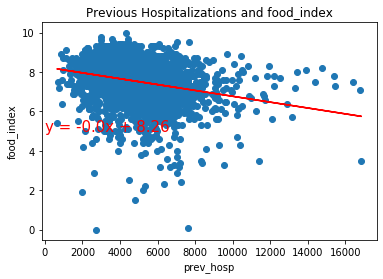

In [17]:
x_values = prev_hosp
y_values = food_index

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('prev_hosp')
plt.ylabel('food_index')
plt.title(f"Previous Hospitalizations and food_index")
plt.show()

The r-squared is: 0.09485247749184204


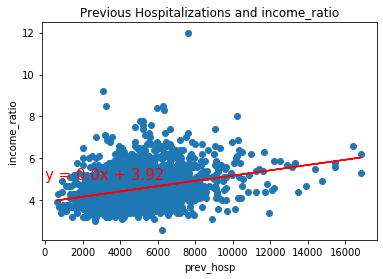

In [16]:
x_values = prev_hosp
y_values = income_ratio

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
#add labels
plt.xlabel('prev_hosp')
plt.ylabel('income_ratio')
plt.title(f"Previous Hospitalizations and income_ratio")
plt.show()

In [ ]:
study_state_geodata2_df